C:\Users\aljer\AppData\Local\Temp\ipykernel_3704\627047212.py:55: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfg = df.groupby(by=['London_Borough', 'Year']).mean()


[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'Southwark'),
 Text(3, 0, 'Lewisham'),
 Text(4, 0, 'Westminster'),
 Text(5, 0, 'Newham'),
 Text(6, 0, 'City of London'),
 Text(7, 0, 'Haringey'),
 Text(8, 0, 'Kensington & Chelsea'),
 Text(9, 0, 'Lambeth'),
 Text(10, 0, 'Camden'),
 Text(11, 0, 'Barking & Dagenham'),
 Text(12, 0, 'Brent'),
 Text(13, 0, 'Islington'),
 Text(14, 0, 'Greenwich')]

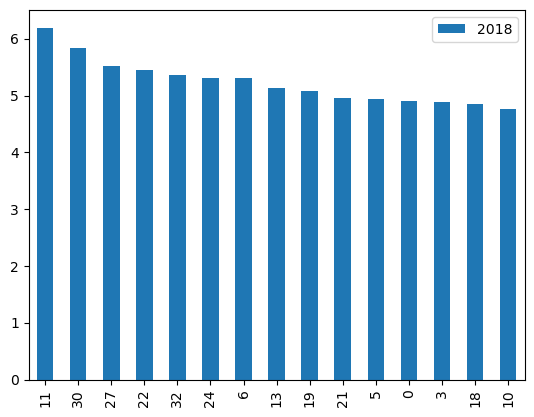

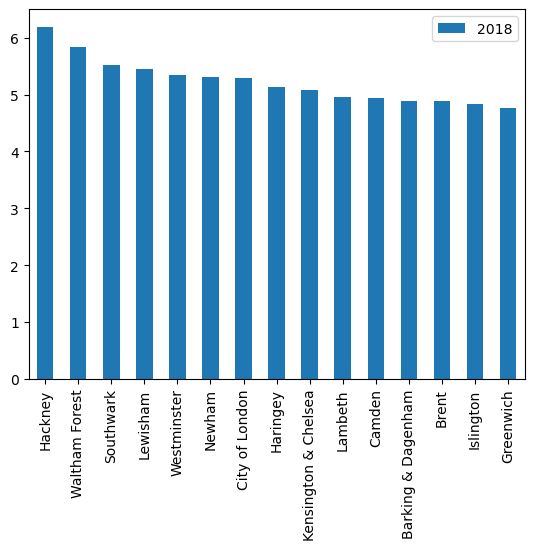

In [16]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd 
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#URL to import
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

#Save data to properties variable
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

#Transpose properties
properties_T = properties.T

#Need first column as values; reset the index
properties_T = properties_T.reset_index()


properties_T.columns = properties_T.iloc[0]

#Correct names
properties_T = properties_T.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})

clean_properties = pd.melt(properties_T, id_vars= ['London_Borough', 'ID'])

clean_properties = clean_properties.rename(columns = {0: 'Month', 'value': 'Average_price'})

# Re-name the column names
clean_properties = clean_properties.rename(columns = {0: 'Month', 'value': 'Average_price'})

clean_properties[clean_properties['ID'].isna()]

# Filter data for NaN values
NaNFreeDF2 = clean_properties.dropna()

nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']


NaNFreeDF2[NaNFreeDF2.London_Borough.isin(nonBoroughs)]

NaNFreeDF2 = NaNFreeDF2[~NaNFreeDF2.London_Borough.isin(nonBoroughs)]

#Final dataframe
df = NaNFreeDF2

#Lambda function to get year
df['Year'] = df['Month'].apply(lambda t: t.year)

dfg = df.groupby(by=['London_Borough', 'Year']).mean()

dfg = dfg.reset_index()


#Calculate ratio of prices
def create_price_ratio(d):
    y1998 = float(d['Average_price'][d['Year']==1998])
    y2018 = float(d['Average_price'][d['Year']==2018])
    ratio = [y2018/y1998]
    return ratio

final = {}

#Loop through every unique borough
for b in dfg['London_Borough'].unique():
    borough = dfg[dfg['London_Borough'] == b]
    final[b] = create_price_ratio(borough)
    
#Get price ratios
df_ratios = pd.DataFrame(final)

df_ratios_T = df_ratios.T
df_ratios = df_ratios_T.reset_index()

df_ratios.rename(columns={'index':'Borough', 0:'2018'}, inplace=True)

top15 = df_ratios.sort_values(by='2018',ascending=False).head(15)

ax = top15[['Borough','2018']].plot(kind='bar')

ax.set_xticklabels(top15.Borough)

In [6]:
type(clean_properties)

pandas.core.frame.DataFrame